### <center> Часть №1. Сумма числового ряда. 

In [57]:
import matplotlib.pyplot as plt
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 12,8

%pylab inline
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


In [58]:
%%time

list_of_members1 = []
n = 1
for k in range(0, 10000):
    list_of_members1.append(((-1)**(k))*(2*k+1)/(n))
    n *= 2

Wall time: 11.9 ms


In [59]:
%%time

partial_sum_list = []
for member in range(0, len(list_of_members1)):
    partial_sum_list.append(sum(list_of_members1[:member]))

Wall time: 1.2 s


In [60]:
series_sum1 = sum(list_of_members1)

In [61]:
series_sum1_reversed = sum(list_of_members1[::-1])

In [62]:
series_sum1, series_sum1_reversed, series_sum1 - series_sum1_reversed

(0.22222222222222215, 0.22222222222222215, 0.0)

In [63]:
series_sum1 - 2/9, series_sum1_reversed - 2/9

(-5.551115123125783e-17, -5.551115123125783e-17)

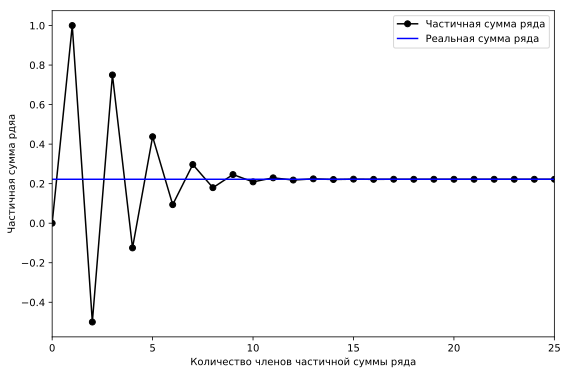

In [64]:
x = np.linspace(0, len(partial_sum_list), len(partial_sum_list))
plt.figure(figsize=(9,6))
plt.plot(x, partial_sum_list, marker='o', color='black', markersize=6)
plt.axhline(2/9, color='b')
plt.xlim(0, 25)
plt.ylabel('Частичная сумма рдяа')
plt.xlabel('Количество членов частичной суммы ряда')
plt.legend(['Частичная сумма ряда', 'Реальная сумма ряда'])

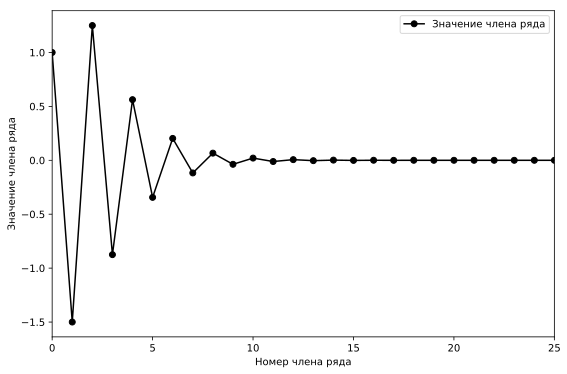

In [65]:
x = np.linspace(0, len(list_of_members1), len(list_of_members1))
plt.figure(figsize=(9,6))
plt.plot(x, list_of_members1, marker='o', color='black', markersize=6)
plt.xlim(0, 25)
plt.ylabel('Значение члена ряда')
plt.xlabel('Номер члена ряда')
plt.legend(['Значение члена ряда'])

### <center> Часть №2. Численное интегрирование методом трапеции.

In [66]:
from scipy import integrate

In [67]:
def method_of_trapezoids(integrand, a, b, number):
    """ 
    Вычисляет приближенное значение интеграла с помощью формулы трапеций,
    а также точное решенение данного интеграла и ошибку измерения.
    integrand - подынтегральная функция
    a, b - пределы интегрирования
    number - количество частичных отрезков
    """
    approximate_solution_list = []
    step = float(b - a)/number
    approximate_solution = 0.5*(integrand(a) + integrand(b))
    approximate_solution_list.append(approximate_solution)
    
    for i in range(1, number):
        approximate_solution += integrand(a + i*step)
        approximate_solution_list.append(integrand(a + i*step))
    approximate_solution *= step

    exact_solution = integrate.quad(integrand, a, b)[0]

    error = approximate_solution - exact_solution
    return print(
                'Приближенное решение: {}, Точное решение: {}, Ошибка измерения: {}, Koличество частичных отрезков: {}'
                 .format(approximate_solution, exact_solution, abs(error), number)
                ),\
                  approximate_solution_list

In [68]:
integrand = lambda x: x*np.sin(x)

In [69]:
solution1 = method_of_trapezoids(integrand, 0, np.pi, 10)

Приближенное решение: 3.1157114868310707, Точное решение: 3.141592653589793, Ошибка измерения: 0.02588116675872243, Koличество частичных отрезков: 10


In [70]:
solution2 = method_of_trapezoids(integrand, 0, np.pi, 100)

Приближенное решение: 3.1413342637004185, Точное решение: 3.141592653589793, Ошибка измерения: 0.000258389889374655, Koличество частичных отрезков: 100


In [71]:
solution3 = method_of_trapezoids(integrand, 0, np.pi, 10000)

Приближенное решение: 3.141592627751224, Точное решение: 3.141592653589793, Ошибка измерения: 2.5838569062131e-08, Koличество частичных отрезков: 10000


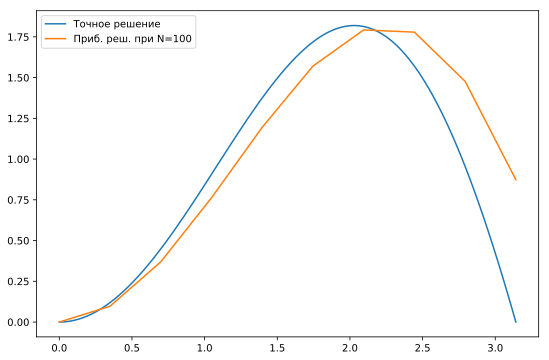

In [72]:
x0 = np.linspace(0, np.pi, 100)
plt.figure(figsize=(9,6))

x1 = np.linspace(0, np.pi, 10)
plt.plot(x0, integrand(x0), x1, solution1[1])
plt.legend(['Точное решение', 'Приб. реш. при N=100'])

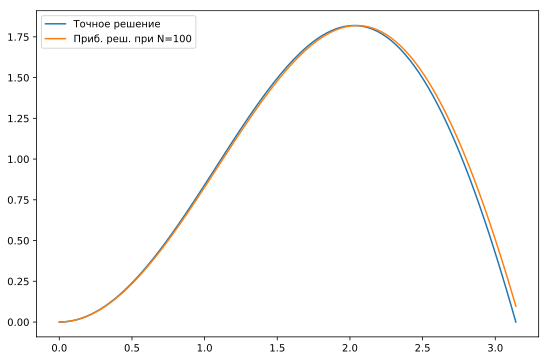

In [73]:
x2 = np.linspace(0, np.pi, 100)
plt.figure(figsize=(9,6))

plt.plot(x0, integrand(x0), x2, solution2[1])
plt.legend(['Точное решение', 'Приб. реш. при N=100'])

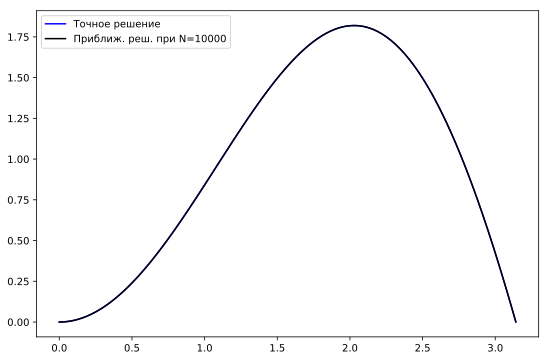

In [74]:
x3 = np.linspace(0, np.pi, 10000)
plt.figure(figsize=(9,6))

plt.plot(x0, integrand(x0), color = 'blue')
plt.plot(x3, solution3[1], color='black')
plt.legend(['Точное решение', 'Приближ. реш. при N=10000'])

In [75]:
! jupyter nbconvert --to html Chisl1.ipynb

[NbConvertApp] Converting notebook Chisl1.ipynb to html
[NbConvertApp] Writing 447285 bytes to Chisl1.html
